In [331]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
from sklearn import linear_model


In [332]:
import matplotlib.pyplot as plt

In [333]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [334]:
def get_stock_data(ticker, start, end):
    stock_data = web.DataReader(ticker, 'yahoo', start, end)
    stock_data = stock_data.rename(columns={"Close":ticker+"_Close"})
    return stock_data

In [335]:
def preprocess_data(spy_df, stock_df, ticker):
    df = spy_df.merge(stock_df, how="inner", on="Date")
    df = df[["SPY_Close", ticker+"_Close"]]
    df = df.reset_index()
    df["Date"] = pd.to_datetime(df['Date']).sort_values()
    df.set_index('Date',inplace=True)
    return df

In [344]:
def run_regression_and_plot(df, ticker):
    X = df[["SPY_Close"]].pct_change()[1:]
    y = df[[ticker+"_Close"]].pct_change()[1:]
    regr = linear_model.LinearRegression()
    # Run a linear regression to get beta of Spy Pct Change on Security's (AAPL's) pct change
    regr.fit(X, y)
      # Gets Beta
    beta = regr.coef_[0][0]
    beta_str = "%.2f" % round(beta, 2)
    alpha = get_alpha(beta, df, ticker)
    alpha_str = "%.2f" % round(alpha, 2)
    print("alpha")
    print(alpha)
    print("beta")
    print(beta)
    #capm = get_capm(alpha, beta)
    # Plot the line of best fit 
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(10,5))
    # Predictions for stock pct change given spy pct change
    y_pred = regr.predict(X)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color="red")
    plt.xlabel("Market Return")
    plt.ylabel("AAPL Return")
    plt.title("Beta of " + ticker + ": " + beta_str + "\nAlpha of " + ticker + ": " + alpha_str)
    plt.show()
    return beta

In [345]:
def get_alpha(beta, df, ticker):
    stock_df_close = df[[ticker+"_Close"]]
    spy_df_close = df[["SPY_Close"]]
    
    risk_free_rate = 0.0063
   
    stock_start_price = stock_df_close.iloc[0]
    stock_end_price = stock_df_close.iloc[len(stock_df_close)-1]
    stock_return = (stock_end_price - stock_start_price)/stock_start_price
    stock_return = stock_return[ticker + "_Close"]
    
    spy_start_price = spy_df_close.iloc[0]
    spy_end_price = spy_df_close.iloc[len(spy_df_close)-1]
    spy_return = (spy_end_price - spy_start_price)/spy_start_price
    market_return = spy_return["SPY_Close"]
    
    alpha = stock_return - risk_free_rate - beta*(market_return - risk_free_rate)
    #get_capm(alpha, beta, market_return)
    return alpha

In [346]:
def get_beta(ticker, start, end):
    

    stock_df = get_stock_data(ticker, start, end)
    preprocessed_df = preprocess_data(spy_df, stock_df, ticker)
    run_regression_and_plot(preprocessed_df, ticker)

In [350]:
start = dt.datetime(2019,9,1)
end = dt.datetime(2020,9,1)
spy_df = get_stock_data("SPY", start, end)
len(spy_df)

253

In [348]:
def get_capm(alpha, beta, market_return):
    #r = Rf + beta (Rm – Rf) + Alpha
    risk_free_rate = 0.0063
    capm = risk_free_rate + beta * (market_return - risk_free_rate) + alpha
    print("CAPM")
    print(capm)
    return capm    


alpha
1.3731892179203316
beta
1.1127535813891816


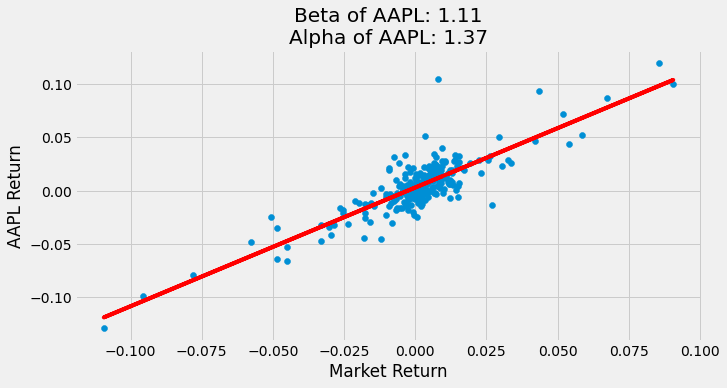

In [351]:
aapl_beta = get_beta("AAPL", start, end)

CAPM
0.2340882798334359
alpha
0.22392079064447984
beta
1.3765917171376865


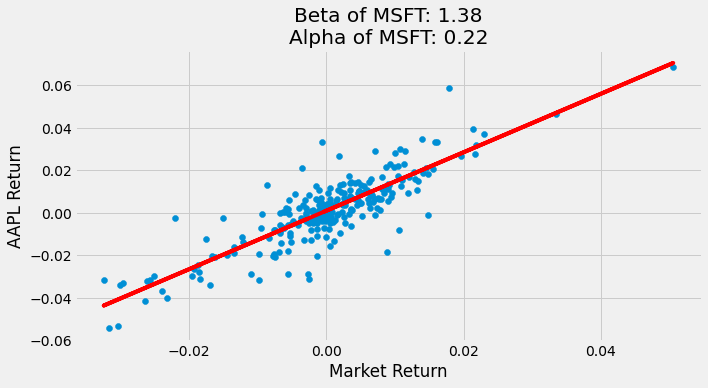

In [327]:
msft_beta = get_beta("MSFT", start, end)

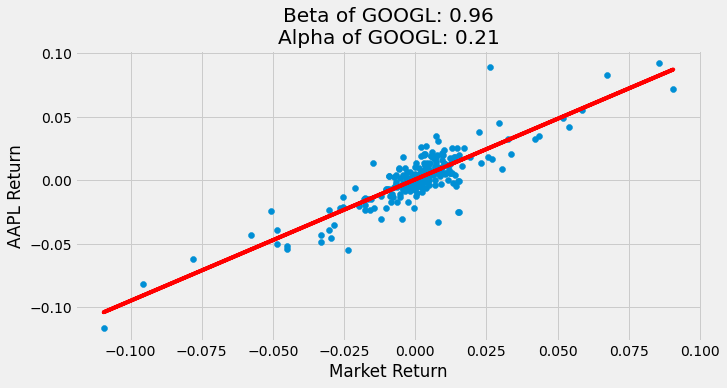

In [267]:
google_beta = get_beta("GOOGL", start, end)

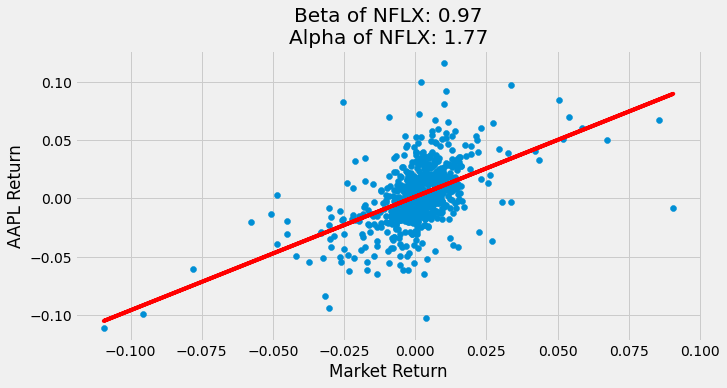

In [260]:
netflix_beta = get_beta("NFLX", start, end)

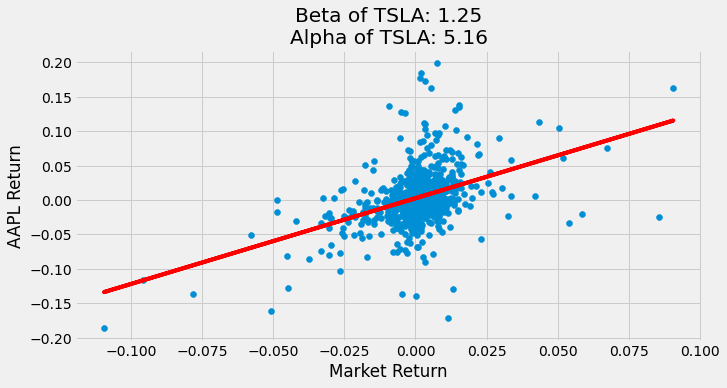

In [261]:
tsla_beta = get_beta("TSLA", start, end)

alpha
-1.1199418251152973
beta
2.172530045140654


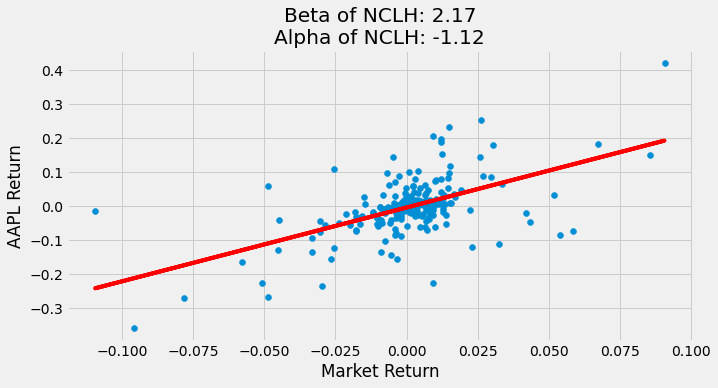

In [343]:
nclh = get_beta("NCLH", start, end)

# END MAIN CODE

# ---------------------

# SCRATCH CODE

In [149]:
aapl = get_stock_data("AAPL",start,end)
spy = get_stock_data("SPY",start,end)
df = preprocess_data(spy, aapl, "AAPL")


AAPL_Close
Date                  
2017-09-01   41.012501
2017-09-05   40.520000
2017-09-06   40.477501
2017-09-07   40.314999
2017-09-08   39.657501
...                ...
2020-08-26  126.522499
2020-08-27  125.010002
2020-08-28  124.807503
2020-08-31  129.039993
2020-09-01  134.179993

[755 rows x 1 columns]

In [226]:

def get_alpha(beta, df, ticker):
    stock_df_close = df[[ticker+"_Close"]]
    spy_df_close = df[["SPY_Close"]]
    
    risk_free_rate = 0.0063
   
    stock_start_price = stock_df_close.iloc[0]
    stock_end_price = stock_df_close.iloc[len(stock_df_close)-1]
    stock_return = (stock_end_price - stock_start_price)/stock_start_price
    stock_return = stock_return[ticker + "_Close"]
    
    spy_start_price = spy_df_close.iloc[0]
    spy_end_price = spy_df_close.iloc[len(spy_df_close)-1]
    spy_return = (spy_end_price - spy_start_price)/spy_start_price
    market_return = spy_return["SPY_Close"]
    
    alpha = stock_return - risk_free_rate - beta*(market_return - risk_free_rate)
    print(stock_return - risk_free_rate)
    return alpha
    
    


ALPHA
Stock return 2.2716852223025543
SPY return SPY_Close    0.422692
dtype: float64
Alpha
1.7710261116137407
beta
1.1872441977235348
s return
2.2716852223025543
risk 
0.0063
beta
1.1872441977235348
market
0.4226921050418404


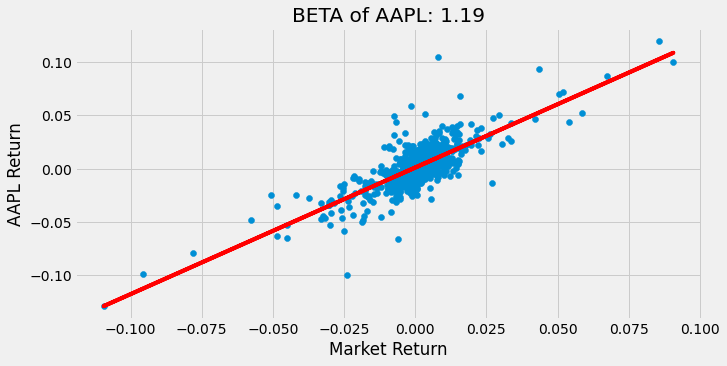

NoneType

In [225]:
def get_alpha_2(ticker, start, end, beta):
    spy_df = get_stock_data("SPY", start, end)
    stock_df = get_stock_data(ticker, start, end)
    preprocessed_df = preprocess_data(spy_df, stock_df, ticker)
    
    stock_df_close =  preprocessed_df[[ticker+"_Close"]]
    spy_df_close = preprocessed_df[["SPY_Close"]]
    
    stock_start_price = stock_df_close.iloc[0]
    stock_end_price = stock_df_close.iloc[len(stock_df_close)-1]
    stock_return = (stock_end_price - stock_start_price)/stock_start_price
    print("Stock return " + str(stock_return))
    
    spy_start_price = spy_df_close.iloc[0]
    spy_end_price = spy_df_close.iloc[len(spy_df_close)-1]
    spy_return = (spy_end_price - spy_start_price)/spy_start_price
    print("SPY return " + str(spy_return))
    
    risk_free_rate = 0.0063
    market_return = spy_return
    
    alpha = stock_return - risk_free_rate - beta*(market_return - risk_free_rate)
    print("Alpha")
    print(alpha)
    return alpha

In [224]:
aapl_close = df[["AAPL_Close"]]
start_price = aapl_close.iloc[0]
end_price = aapl_close.iloc[len(aapl_close)-1]
stock_return = (end_price - start_price)/start_price
print(stock_return, start_price, end_price)

risk_free_rate = 0.0063
market_return = df[["SPY_Close"]]



AAPL_Close    2.271685
dtype: float64 AAPL_Close    41.012501
Name: 2017-09-01 00:00:00, dtype: float64 AAPL_Close    134.179993
Name: 2020-09-01 00:00:00, dtype: float64


In [65]:
#spy = pd.read_csv("SPY.csv", index_col="Date")

# Define Dates for api lookup
start = dt.datetime(2017,9,1)
end = dt.datetime(2020,9,1)

In [25]:
# get spy csv and rename close column
spy = web.DataReader("SPY",'yahoo', start, end)
spy = spy.rename(columns={"Close":"SPY_Close"})
spy.head()

High         Low        Open   SPY_Close      Volume  \
Date                                                                     
2017-09-01  248.330002  247.669998  247.919998  247.839996  62007000.0   
2017-09-05  247.520004  244.949997  247.259995  246.059998  91398800.0   
2017-09-06  247.279999  246.229996  246.839996  246.899994  57916900.0   
2017-09-07  247.270004  246.399994  247.250000  246.869995  58034700.0   
2017-09-08  247.110001  246.300003  246.539993  246.580002  63832800.0   

             Adj Close  
Date                    
2017-09-01  233.902664  
2017-09-05  232.222748  
2017-09-06  233.015503  
2017-09-07  232.987213  
2017-09-08  232.713516

In [12]:
# get aapl csv and rename close column
aapl = web.DataReader("AAPL",'yahoo', start, end)
aapl = aapl.rename(columns={"Close":"AAPL_Close"})


In [144]:
#aapl = pd.read_csv("AAPL.csv", index_col="Date")
#aapl = aapl.rename(columns={"Close":"AAPL_Close"})
#amzn = pd.read_csv("AMZN.csv", index_col="Date")
#amzn = amzn.rename(columns={"Close":"AMZN_Close"}) 


In [13]:
spy.head()

High         Low        Open   SPY_Close      Volume  \
Date                                                                     
2017-09-01  248.330002  247.669998  247.919998  247.839996  62007000.0   
2017-09-05  247.520004  244.949997  247.259995  246.059998  91398800.0   
2017-09-06  247.279999  246.229996  246.839996  246.899994  57916900.0   
2017-09-07  247.270004  246.399994  247.250000  246.869995  58034700.0   
2017-09-08  247.110001  246.300003  246.539993  246.580002  63832800.0   

             Adj Close  
Date                    
2017-09-01  233.902664  
2017-09-05  232.222748  
2017-09-06  233.015503  
2017-09-07  232.987213  
2017-09-08  232.713516

In [14]:
# Merge stock datasets on date
df = spy.merge(aapl, how="inner", on="Date")

In [15]:
df.head()

High_x       Low_x      Open_x   SPY_Close    Volume_x  \
Date                                                                     
2017-09-01  248.330002  247.669998  247.919998  247.839996  62007000.0   
2017-09-05  247.520004  244.949997  247.259995  246.059998  91398800.0   
2017-09-06  247.279999  246.229996  246.839996  246.899994  57916900.0   
2017-09-07  247.270004  246.399994  247.250000  246.869995  58034700.0   
2017-09-08  247.110001  246.300003  246.539993  246.580002  63832800.0   

            Adj Close_x     High_y      Low_y     Open_y  AAPL_Close  \
Date                                                                   
2017-09-01   233.902664  41.235001  40.907501  41.200001   41.012501   
2017-09-05   232.222748  41.062500  40.139999  40.937500   40.520000   
2017-09-06   233.015503  40.747501  40.130001  40.677502   40.477501   
2017-09-07   232.987213  40.560001  40.090000  40.522499   40.314999   
2017-09-08   232.713516  40.287498  39.632500  40.215000   39.657501   

               Volume_y  Adj Close_y  
Date                                  
2017-09-01   66364400.0    39.393410  
2017-09-05  117874000.0    38.920349  
2017-09-06   86606800.0    38.879524  
2017-09-07   87714000.0    38.723442  
2017-09-08  114446000.0    38.091904

In [16]:
df = df[["SPY_Close", "AAPL_Close"]]

In [17]:
df = df.reset_index()

In [18]:
df["Date"] = pd.to_datetime(df['Date']).sort_values()

In [19]:
df.set_index('Date',inplace=True)

In [20]:
df.head()

SPY_Close  AAPL_Close
Date                              
2017-09-01  247.839996   41.012501
2017-09-05  246.059998   40.520000
2017-09-06  246.899994   40.477501
2017-09-07  246.869995   40.314999
2017-09-08  246.580002   39.657501

In [26]:
from sklearn import linear_model
# Get pct change for each stock
X = df[["SPY_Close"]].pct_change()[1:]
y = df[["AAPL_Close"]].pct_change()[1:]
regr = linear_model.LinearRegression()
# Run a linear regression to get beta of Spy Pct Change on Security's (AAPL's) pct change
regr.fit(X, y)

LinearRegression()

In [38]:
# BETA COEFFICIENT
regr.coef_
beta = regr.coef_[0][0]
beta = "%.2f" % round(beta, 2)
beta

'1.19'

Text(0.5, 1.0, 'BETA of AAPL: 1.19')

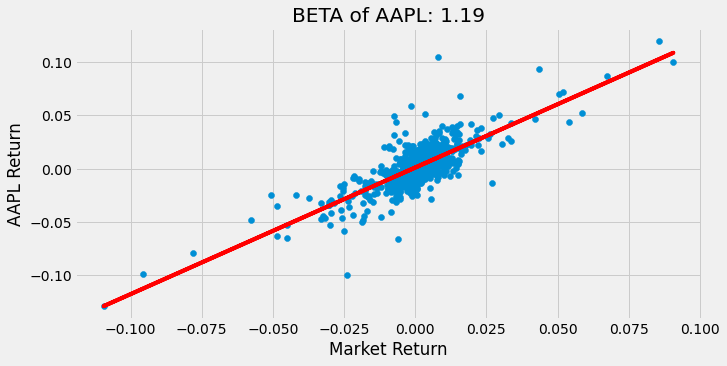

In [40]:
# Plot the line of best fit 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
y_pred = regr.predict(X)
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.xlabel("Market Return")
plt.ylabel("AAPL Return")
plt.title("BETA of AAPL: " + beta)